# Apropiación del Notebook de Hugo Peña

In [1]:
!pip install scikit-image watermark -q

# Install OpenCV package first
!pip install opencv-python -q

# First install the required system library
!apt-get update && apt-get install -y libgl1-mesa-glx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.2 MB/s eta 0:00:00
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,747 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [9,053 kB]
Get:1

## Importamos librerias

In [2]:
import cv2
import random
import numpy as np
import urllib.request
import matplotlib.pyplot as plt

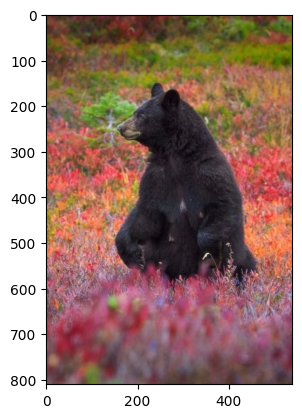

In [3]:
from skimage.io import imread  # Import imread function

imagen = imread('/content/Black_bear.jpeg')
plt.imshow(imagen)
plt.show()

## La mostramos por pantalla

Se carga la imagen en RGB

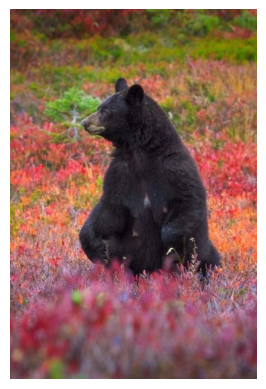

In [4]:
plt.axis("off")
plt.imshow(imagen)

### Visualizo la imagen en BGR

Dimensiones de la imagen: (810, 540, 3)
Tipo de datos: uint8
Tamaño en memoria (bytes): 1312200


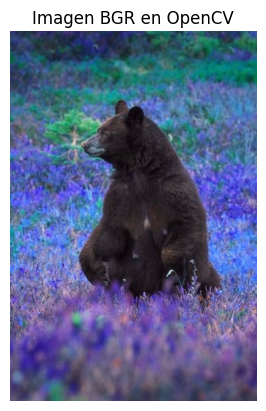

In [6]:
# Lectura de imagen usando OpenCV
imagen_bgr = cv2.imread('/content/Black_bear.jpeg') #lee la imagen en BGR (por defecto).

# Información básica de la imagen
print("Dimensiones de la imagen:", imagen_bgr.shape)
print("Tipo de datos:", imagen_bgr.dtype)
print("Tamaño en memoria (bytes):", imagen_bgr.nbytes)

# Visualización de la imagen completa
#cv2_imshow(imagen_bgr) al trabajar con Deepnote esa linea no funciona entonces usamos plt
plt.imshow(imagen_bgr)
plt.title('Imagen BGR en OpenCV')
plt.axis('off')  # ON Muestra los ejes para referencia OFF No muestra los ejes
#plt.colorbar()  # Añade barra de color pero no la muestra por estar comentada
plt.show()

## Como vemos que está en BGR (ya que cv2 trabaja en ese formato), la pasamos a RGB que es la forma tradicional en que vemos las fotos.

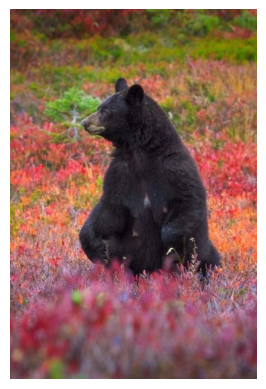

In [7]:
imagen_rgb = cv2.cvtColor(imagen_bgr, cv2.COLOR_BGR2RGB)
plt.axis("off")
plt.imshow(imagen_rgb)

## Realizamos una iteración por los disintos kernels y sigmas más frecuentes para tener varias muestras y elegir alguna o acercarnos a algún objetivo en particular.

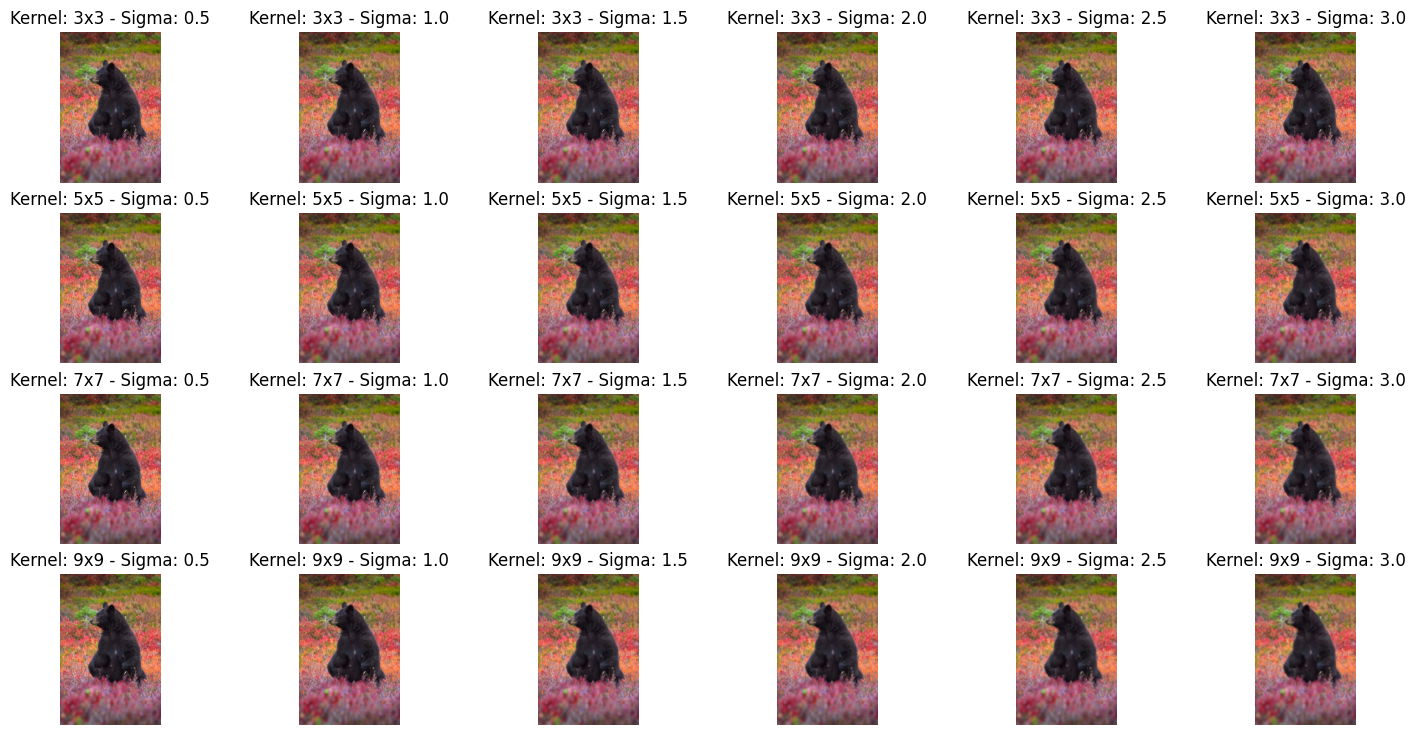

In [8]:
kernel_sizes = [3, 5, 7, 9]
sigma_values = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
plt.figure(figsize=(18, 9))
cont = 1
for i in kernel_sizes: # este for está iterando sobre la lista de kernels
    for sigma in sigma_values: # este for está iterando sobre la lista de sigmas
        imagen_blur = cv2.GaussianBlur(imagen_rgb, (i, i), sigma)
        plt.subplot(4, 6, cont)
        plt.imshow(imagen_blur)
        plt.title(f"Kernel: {i}x{i} - Sigma: {round(sigma, 1)}")
        plt.axis('off')
        cont += 1
plt.show()



## Una vez que vimos alguna muestra que nos guste, podremos seleccionarla para trabajar con ella.

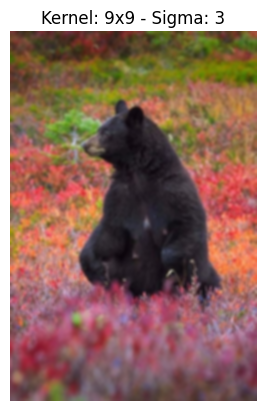

In [9]:
kernel_elegido = 9 # Acá podemos cambiar el valor de los kernels que querramos
sigma_elegida = 3 # Acá podemos cambiar el valor de sigma que querramos
imagen_blur_elegida = cv2.GaussianBlur(imagen_rgb, (kernel_elegido,kernel_elegido), sigma_elegida)
plt.axis('off')
plt.title(f"Kernel: {kernel_elegido}x{kernel_elegido} - Sigma: {round(sigma_elegida, 1)}")
plt.imshow(imagen_blur_elegida) # recordar que si cambiamos el nombre de la variable de arriba, acá también hay que cambiarlo.

## Si nos nos gustó ninguna podemos probar kernels y sigmas aleatorios.

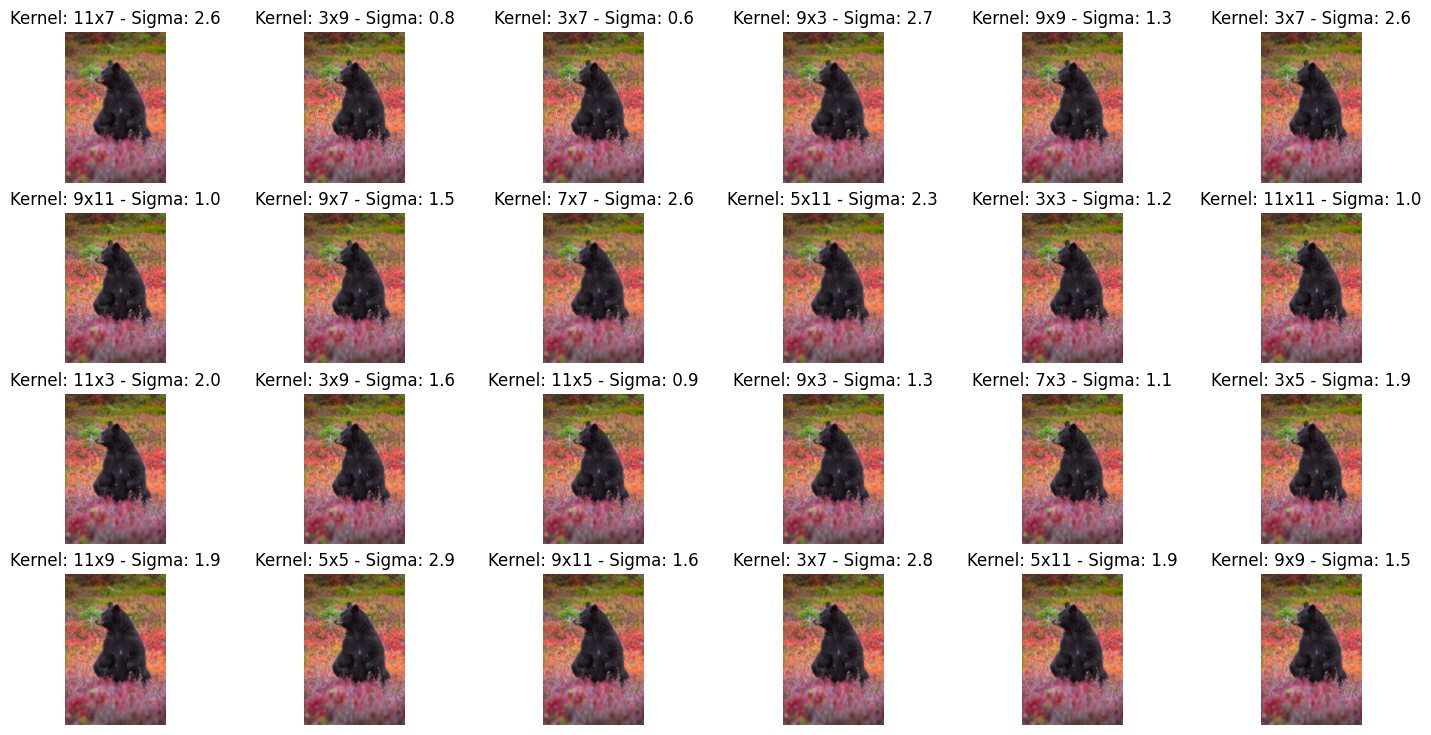

In [10]:
plt.figure(figsize=(18, 9))
cont = 1
for i in range(24): # ahora por cada vuelta del for hay dos kernels por separado y una sigma, todos aleatorios dentro de un rango coherente.
      kernel1 = random.choice([3, 5, 7, 9, 11]) # primer kernel aleatorio entre 3,5,7,9,11
      kernel2 = random.choice([3, 5, 7, 9, 11]) # segundo kernel aleatorio entre 3,5,7,9,11
      sigma =  random.uniform(0.5, 3.0) # sigma aleatoria con valores entre 0.5 y 3.0
      imagen_blur = cv2.GaussianBlur(imagen_rgb, (kernel1, kernel2), sigma)
      plt.subplot(4, 6, cont)
      plt.imshow(imagen_blur)
      plt.title(f"Kernel: {kernel1}x{kernel2} - Sigma: {round(sigma, 1)}")
      plt.axis('off')
      cont += 1
plt.show()

## Algo un poco más loco, pero quizás efectivo..

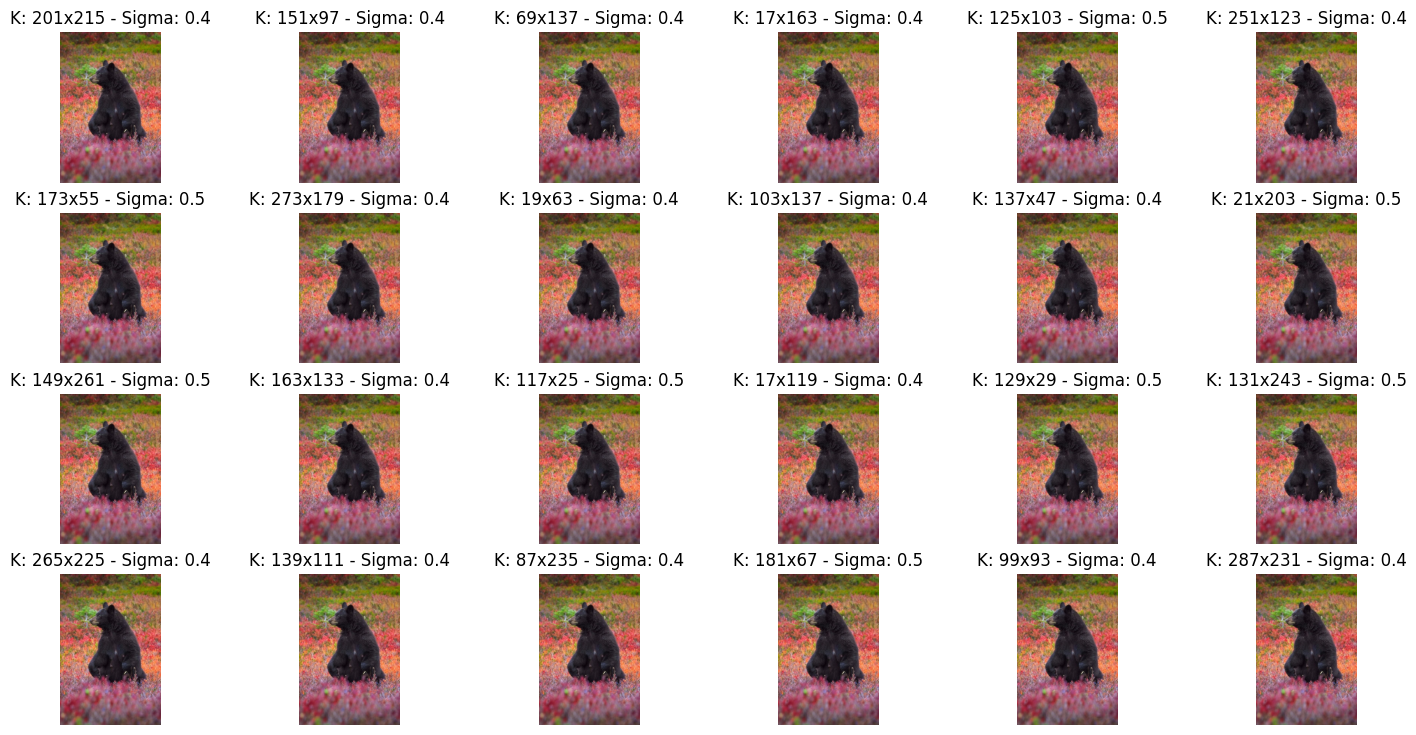

In [11]:
numeros_impares = list(range(1, 302, 2)) # creamos esta lista para que los kernels vayan desde 1 hasta 299 (solo los números impares)
plt.figure(figsize=(18, 9))
cont = 1
for i in range(24):
      kernel1 = random.choice(numeros_impares) # primer kernel aleatorio
      kernel2 = random.choice(numeros_impares) # segundo kernel aleatorio
      sigma =  random.uniform(0.5, 0.39) #sigma aleatoria etre 0.5 y 39.0 (podríamos probar que pasa con una sigma negativa)
      imagen_blur = cv2.GaussianBlur(imagen_rgb, (kernel1, kernel2), sigma)
      plt.subplot(4, 6, cont)
      plt.imshow(imagen_blur)
      plt.title(f"K: {kernel1}x{kernel2} - Sigma: {round(sigma, 1)}")
      plt.axis('off')
      cont += 1
plt.show()

## Bueno me terminó gustando más esta !

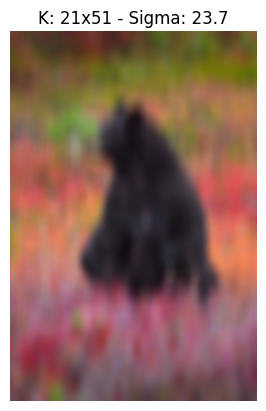

In [12]:
kernel1_elegido= 21 # acá podemos cambiar el primer kernel (recordar que tiene que ser impar)
kernel2_elegido = 51 # acá podemos cambiar el segundo kernel (recordar que tiene que ser impar)
sigma_elegida = 23.7 # acá podemos cambiar la sigma
imagen_blur_elegida = cv2.GaussianBlur(imagen_rgb, (kernel1_elegido,kernel2_elegido), sigma_elegida)
plt.title(f"K: {kernel1_elegido}x{kernel2_elegido} - Sigma: {round(sigma_elegida, 1)}")
plt.axis('off')
plt.imshow(imagen_blur_elegida) # recordar que si cambiamos el nombre de la variable de arriba, acá también hay que cambiarlo.

## Pasamos a escala de grises para poder continuar con el proceso.

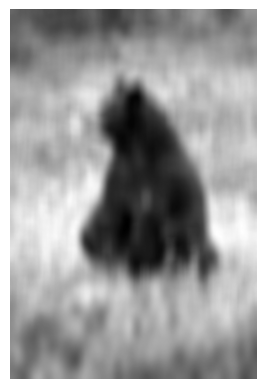

In [13]:
imagen_gris = cv2.cvtColor(imagen_blur_elegida, cv2.COLOR_RGB2GRAY)
plt.axis('off')
plt.imshow(imagen_gris, cmap='gray')

## Aplicamos método Canny e iteramos sobre distintos valores para ver que tipo de umbrales me permite una mejor detección de bordes, tener en cuenta que aveces la imágen puede ser un poco compleja, en dicho caso puede ejecutar varias veces el siguiente código hasta conseguir un resutado convicente, o volver al paso anterior para corregir el suavizado, o en última instancia cambiar de fotografía.

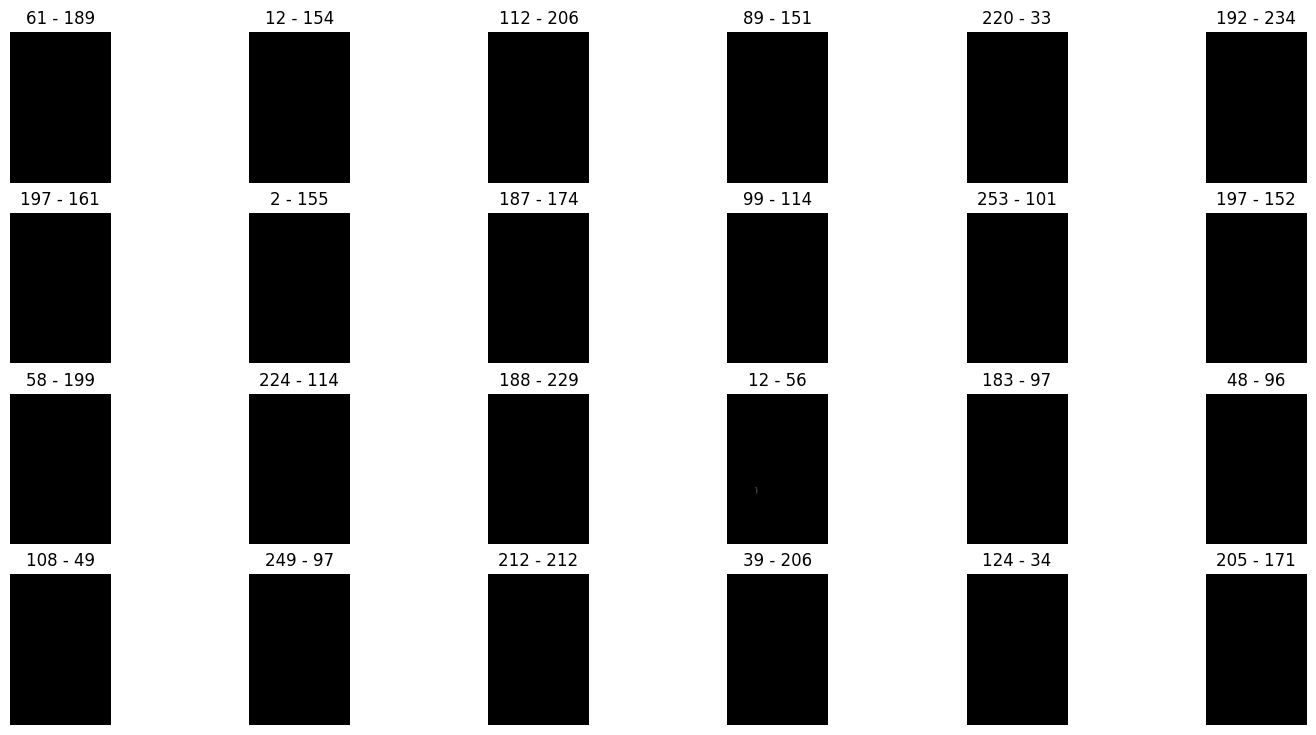

In [14]:
plt.figure(figsize=(18, 9))
cont = 1
for i in range(24): # para cada vuelta del for hay dos umbrales aleatorios entre 0 y 255
      umbral1 = random.randint(0,255) # primer umbral aleatorio entre 0 y 255
      umbral2 = random.randint(0,255) # segundo umbral aleatorio entre 0 y 255
      imagen_canny = cv2.Canny(imagen_gris, umbral1, umbral2)
      plt.subplot(4, 6, cont)
      plt.imshow(imagen_canny, cmap='gray')
      plt.title(f"{umbral1} - {umbral2}")
      plt.axis('off')
      cont += 1
plt.show()

## Después de varias iteraciones en el fragmento de código anterior nos damos cuenta que los rangos más optimos de ubrales parecen moverse entre 10 y 41

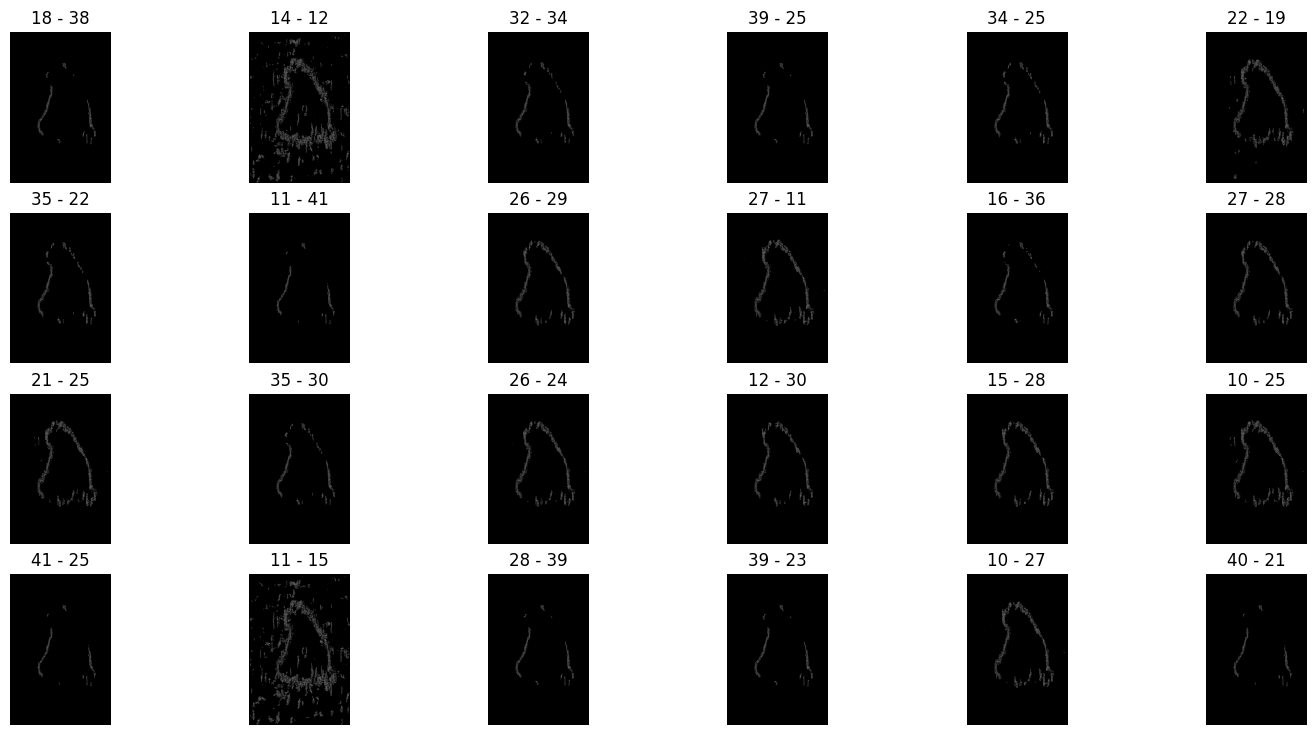

In [15]:
plt.figure(figsize=(18, 9))
cont = 1
for i in range(24):  # ahora para cada vuelta del for hay dos umbrales aleatorios entre 10 y 41
      umbral1 = random.randint(10,41) # primer umbral aleatorio entre 10 y 41
      umbral2 = random.randint(10,41) # segundo umbral aleatorio entre 10 y 41
      imagen_canny = cv2.Canny(imagen_gris, umbral1, umbral2)
      plt.subplot(4, 6, cont)
      plt.imshow(imagen_canny, cmap='gray')
      plt.title(f"{umbral1} - {umbral2}")
      plt.axis('off')
      cont += 1
plt.show()

## Por último elegimos a nuestro criterio

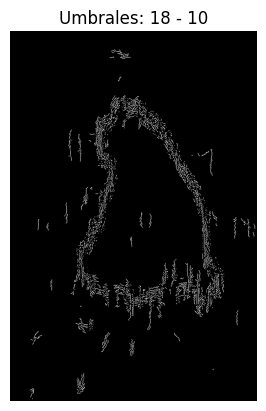

In [16]:
umbral1_elegido = 18 # acá podemos cambiar el primer umbral (no hace falta que sea impar)
umbral2_elegido = 10 # acá podemos cambiar el segundo umbral (no hace falta que sea impar)
imagen_canny_elegida = cv2.Canny(imagen_gris, umbral1_elegido, umbral2_elegido)
plt.title(f"Umbrales: {umbral1_elegido} - {umbral2_elegido}")
plt.axis('off')
plt.imshow(imagen_canny_elegida, cmap='gray')

## Antes de finalizar una duda que me surgió fue que pasa si cruzo los umbrales, ya que pense que el umbrel deberia moverse entre un valor menor a otro mayor.. pero en el siguiente experimento damos vuelta el orden de los umbrales y parece que da la misma imagen, la posibilidad es que no hay alteración alguna.. o quizás la libería internamente coloca primero al menor y luego al mayor.. es un tema para seguir investigando..

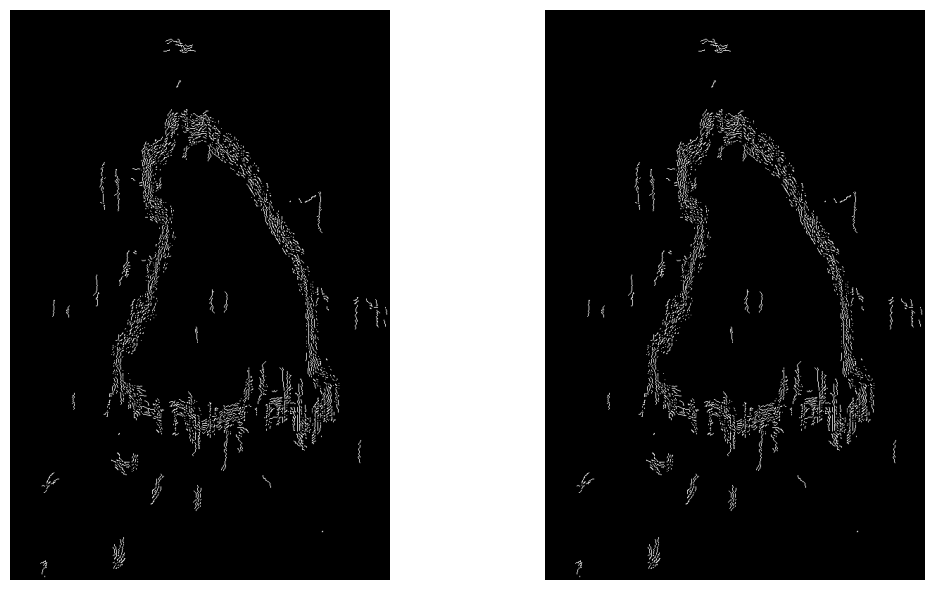

In [17]:
imagen = cv2.Canny(imagen_gris, umbral1_elegido, umbral2_elegido) # dejamos los umbrales normalmente (18,10)
imagen2 = cv2.Canny(imagen_gris, umbral2_elegido, umbral1_elegido) # invertimos los umbrales (10,18)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(imagen, cmap='gray') # primera imagen (imagen)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(imagen2, cmap='gray') # segunda imagen (imagen2)
plt.axis('off')
plt.tight_layout()
plt.show()